# Section: Thông tin
MSSV: 20520934

Họ tên: Bùi Quốc Thịnh

Bài tập: 6

Ngày thực hiện: 18/04/2022

## Yêu cầu 1
Áp dụng phân đoạn ảnh cho các ảnh:
1. Chọn ngưỡng: global

• particles.bmp

• Phandoan01.jpg

• wdg2.jpg

In [327]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [328]:
pip install fuzzy-c-means

In [329]:
import os
import cv2 
import numpy as np
from scipy import ndimage
from google.colab.patches import cv2_imshow
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from fcmeans import FCM
from sklearn.datasets import make_blobs

In [330]:
dir_dataset = '/gdrive/MyDrive/CS231.M21.KHCL/Baitap/Baitap6/images/'
particles_path = os.path.join(dir_dataset, 'particles.bmp')
Phandoan01_path = os.path.join(dir_dataset, 'Phandoan01.jpg')
wdg2_path = os.path.join(dir_dataset, 'wdg2.jpg')
wdg3_path = os.path.join(dir_dataset, 'wdg3.jpg')
son1_path = os.path.join(dir_dataset, 'son1.jpg')
vegetables_path = os.path.join(dir_dataset, 'vegetables.jpg')
hand_path = os.path.join(dir_dataset, 'hand.jpg')
thuoc_path = os.path.join(dir_dataset, 'thuoc.jpg')
dogcat_path = os.path.join(dir_dataset, 'dogcat.jpg')
lionelmessi_path = os.path.join(dir_dataset, 'Lionel-Messi.jpg')
camourflage_path = os.path.join(dir_dataset, 'camourflage_00097.jpg')
camourflage2_path = os.path.join(dir_dataset, 'camourflage_00129.jpg')

In [331]:
def drawHist(x):
  hist = cv2.calcHist([x], [0], None, [256], [0, 256])
  plt.plot(hist)
  plt.xlim([0, 256])
  plt.legend(('histogram'), loc = 'upper left')
  plt.show()  

In [332]:
def globalThresholding(img, thres=127):
  img_rst = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img_rst[i][j] < thres:
        img_rst[i][j] = 255
      else:
        img_rst[i][j] = 0
  return img_rst

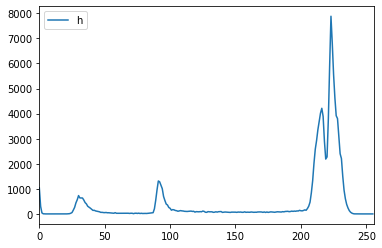

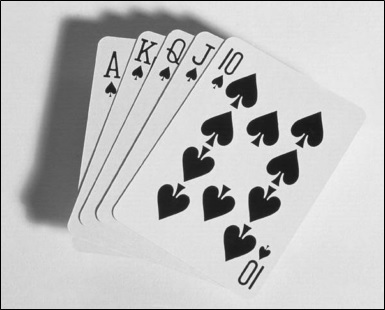

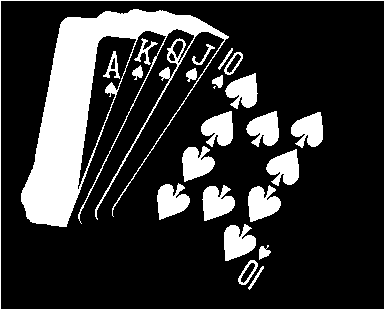

In [333]:
Phandoan01 = cv2.imread(Phandoan01_path, 0)
global_Phandoan01 = globalThresholding(Phandoan01, 160)
drawHist(Phandoan01)
cv2_imshow(Phandoan01)
cv2_imshow(global_Phandoan01)

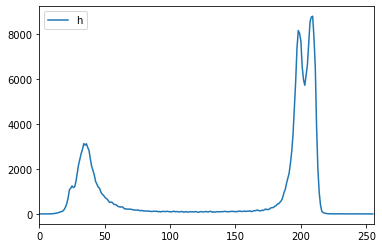

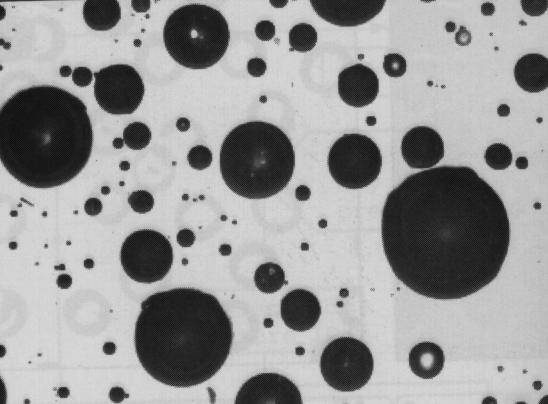

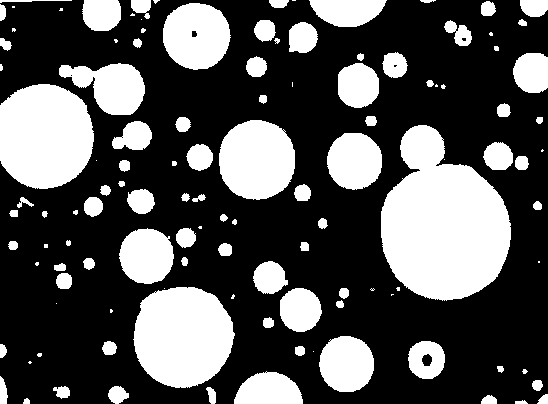

In [334]:
particles = cv2.imread(particles_path, 0)
global_particles = globalThresholding(particles, 170)
drawHist(particles)
cv2_imshow(particles)
cv2_imshow(global_particles)

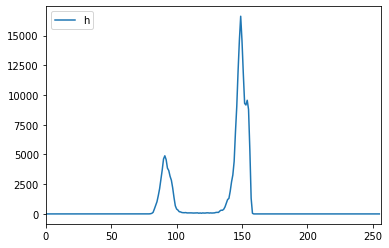

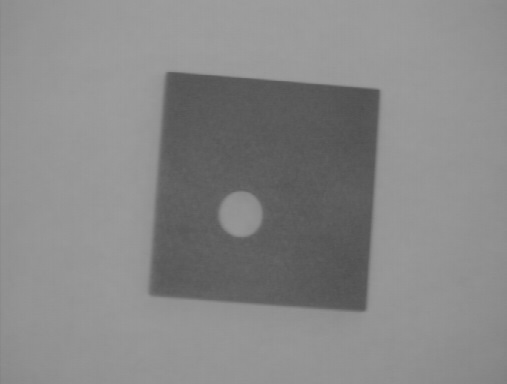

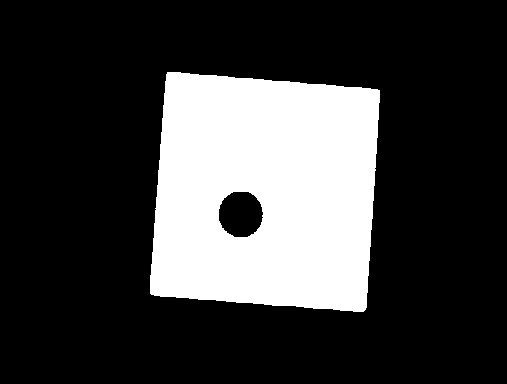

In [335]:
wdg2 = cv2.imread(wdg2_path, 0)
global_wdg2 = globalThresholding(wdg2, 120)
drawHist(wdg2)
cv2_imshow(wdg2)
cv2_imshow(global_wdg2)

## Yêu cầu 2
Chọn ngưỡng: Adaptive

• Ảnh wdg3.jpg

• Hoặc son1.jpg

In [336]:
def adaptiveThresholding(f, nrow, ncol):
  g = f.copy()
  r = int(f.shape[0] / nrow)
  c = int(f.shape[1] / ncol)
  for i in range(int(nrow)):
    for j in range(int(ncol)):
      x = f[i * r : (i + 1) * r, j * c : (j + 1) * c]
      #cv2_imshow(x)
      #drawHist(x)
      t = np.average(x)
      #t = int(input())
      g[i * r : (i + 1) * r, j * c : (j + 1) * c] = globalThresholding(x, t)
  return g

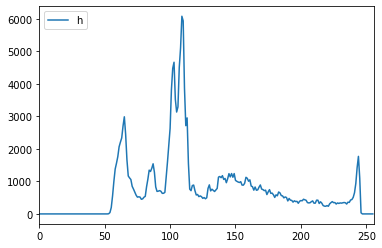

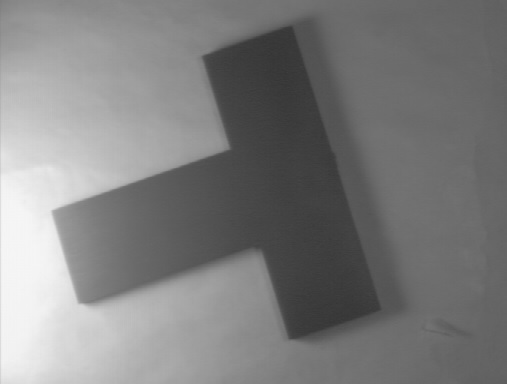

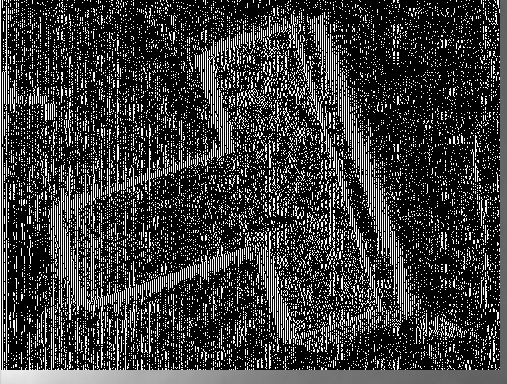

In [337]:
wdg3 = cv2.imread(wdg3_path, 0)
adapt_wdg3 = adaptiveThresholding(wdg3, 370, 250)
drawHist(wdg3)
cv2_imshow(wdg3)
cv2_imshow(adapt_wdg3)

## Áp dụng thuật toán K-means, MeanShift, FCM
 Representing each pixel as (r,g,b)

– Áp dụng cho 4 ảnh: vegetables.jpg, hand.jpg,
thuoc.jpg, dogcat.jpg

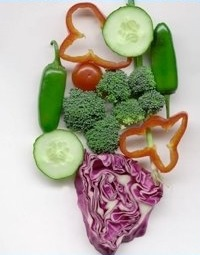

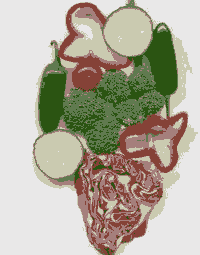

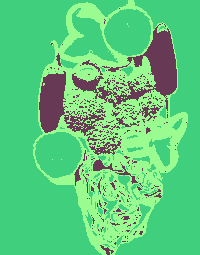

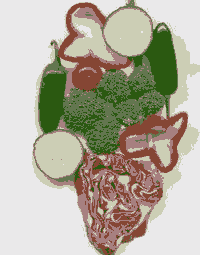

In [338]:
vegetables = cv2.imread(vegetables_path)
cv2_imshow(vegetables)

nrow, ncol,nchl = vegetables.shape
g = vegetables.reshape(nrow*ncol,nchl)

#kmeans
k_means = KMeans(n_clusters = 6, random_state = 0).fit(g)

t = k_means.cluster_centers_[k_means.labels_]
img_res = t.reshape(nrow, ncol, nchl)
cv2_imshow(img_res)

#meanshift
bandwidth = estimate_bandwidth(g, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(g)
labels = ms.labels_
h = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

arrcolor = np.random.rand(20,3) * 255
h = arrcolor[labels]
img_res2 = h.reshape(nrow, ncol, nchl)
cv2_imshow(img_res2)

#fcm
fcm = FCM(n_clusters=6)
fcm.fit(g)
fcm_labels = fcm.predict(g)
k = fcm.centers[fcm_labels]
img_res3 = k.reshape(nrow, ncol, nchl)
cv2_imshow(img_res3)

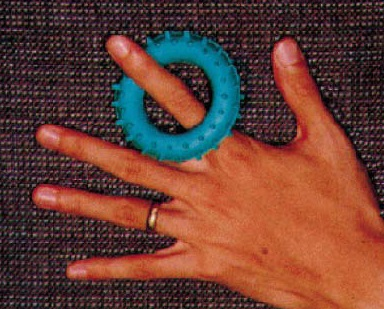

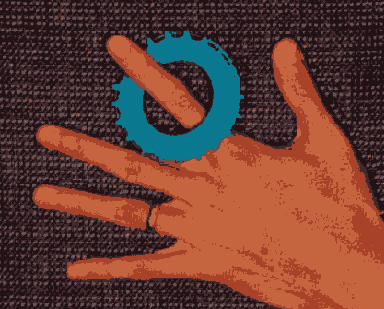

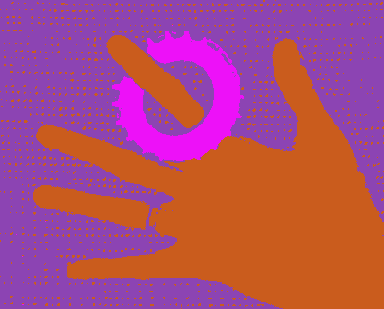

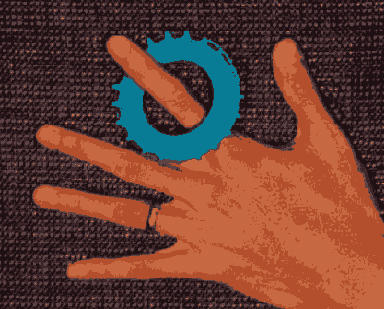

In [339]:
hand = cv2.imread(hand_path)
cv2_imshow(hand)

nrow, ncol,nchl = hand.shape
g = hand.reshape(nrow*ncol,nchl)

#kmeans
k_means = KMeans(n_clusters = 6, random_state = 0).fit(g)

t = k_means.cluster_centers_[k_means.labels_]
img_res = t.reshape(nrow, ncol, nchl)
cv2_imshow(img_res)

#meanshift
bandwidth = estimate_bandwidth(g, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(g)
labels = ms.labels_
h = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

arrcolor = np.random.rand(20,3) * 255
h = arrcolor[labels]
img_res2 = h.reshape(nrow, ncol, nchl)
cv2_imshow(img_res2)

#fcm
fcm = FCM(n_clusters=6)
fcm.fit(g)
fcm_labels = fcm.predict(g)
k = fcm.centers[fcm_labels]
img_res3 = k.reshape(nrow, ncol, nchl)
cv2_imshow(img_res3)

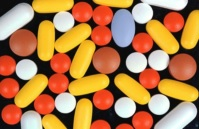

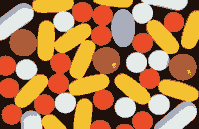

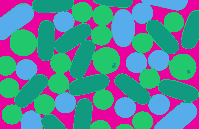

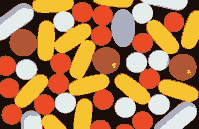

In [340]:
thuoc = cv2.imread(thuoc_path)
cv2_imshow(thuoc)

nrow, ncol,nchl = thuoc.shape
g = thuoc.reshape(nrow*ncol,nchl)

k_means = KMeans(n_clusters = 6, random_state = 0).fit(g)

t = k_means.cluster_centers_[k_means.labels_]
img_res = t.reshape(nrow, ncol, nchl)
cv2_imshow(img_res)

#meanshift
bandwidth = estimate_bandwidth(g, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(g)
labels = ms.labels_
h = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

arrcolor = np.random.rand(20,3) * 255
h = arrcolor[labels]
img_res2 = h.reshape(nrow, ncol, nchl)
cv2_imshow(img_res2)

#fcm
fcm = FCM(n_clusters=6)
fcm.fit(g)
fcm_labels = fcm.predict(g)
k = fcm.centers[fcm_labels]
img_res3 = k.reshape(nrow, ncol, nchl)
cv2_imshow(img_res3)

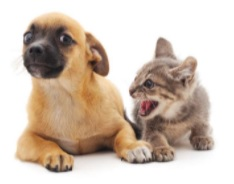

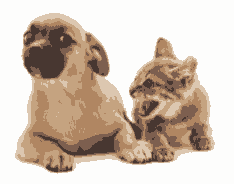

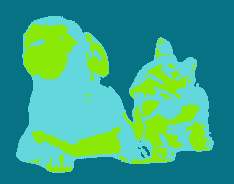

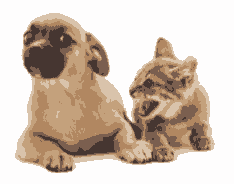

In [341]:
dogcat = cv2.imread(dogcat_path)
cv2_imshow(dogcat)

nrow, ncol,nchl = dogcat.shape
g = dogcat.reshape(nrow*ncol,nchl)

#kmeans
k_means = KMeans(n_clusters = 6, random_state = 0).fit(g)

t = k_means.cluster_centers_[k_means.labels_]
img_res = t.reshape(nrow, ncol, nchl)
cv2_imshow(img_res)

#meanshift
bandwidth = estimate_bandwidth(g, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(g)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

arrcolor = np.random.rand(20,3) * 255
h = arrcolor[labels]
img_res2 = h.reshape(nrow, ncol, nchl)
cv2_imshow(img_res2)

#fcm
fcm = FCM(n_clusters=6)
fcm.fit(g)
fcm_labels = fcm.predict(g)
k = fcm.centers[fcm_labels]
img_res3 = k.reshape(nrow, ncol, nchl)
cv2_imshow(img_res3)

Representing each pixel as (r,g,b,x,y)

– Áp dụng cho 4 ảnh: vegetables.jpg, hand.jpg,
thuoc.jpg 

In [342]:
def Kmeans2(img, n_clusters, option):
             
  img_tmp = img.copy()
  nrow, ncol,nchl = img.shape

  g = []
  for y in range(nrow):
    for x in range(ncol):
      tmp = [img_tmp[y,x][0], img_tmp[y,x][1], img_tmp[y,x][2], x, y]
      g.append(tmp)

  if option==0:
    k_means = KMeans(n_clusters=n_clusters, random_state=0).fit(g)
    t = k_means.cluster_centers_[k_means.labels_]
    arrcolor = np.random.rand(20,3) * 255
    t = arrcolor[k_means.labels_]
    img_res = img_tmp
    i = 0
    for y in range(nrow):
      for x in range(ncol):
        img_res[y, x] = t[i][0:3]
        i += 1
  elif option==1:
    # centers = [[1, 1], [-1, -1], [1, -1]]
    # X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
    bandwidth = estimate_bandwidth(g, quantile=0.2, n_samples=500)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(g)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)

    arrcolor = np.random.rand(20,3) * 255
    t = arrcolor[labels]
    img_res = img_tmp
    i = 0
    for y in range(nrow):
      for x in range(ncol):
        img_res[y, x] = t[i][0:3]
        i += 1
  elif option==2:
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(np.array(g))
    fcm_labels = fcm.predict(np.array(g))
    t = fcm.centers[fcm_labels]
    img_res = img_tmp
    i = 0
    for y in range(nrow):
      for x in range(ncol):
        img_res[y, x] = t[i][0:3]
        i += 1

  return img_res

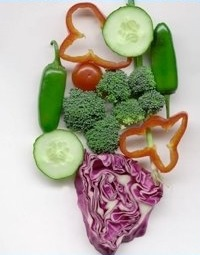

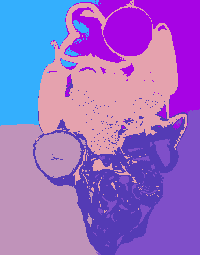

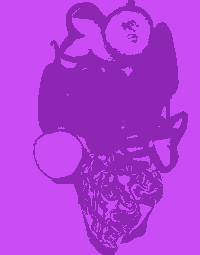

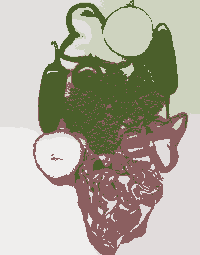

In [343]:
cv2_imshow(vegetables)
cv2_imshow(Kmeans2(vegetables, 6, 0))
cv2_imshow(Kmeans2(vegetables, 6, 1))
cv2_imshow(Kmeans2(vegetables, 6, 2))

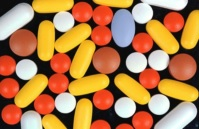

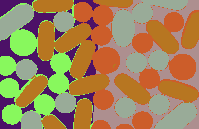

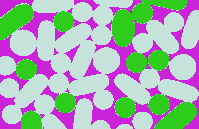

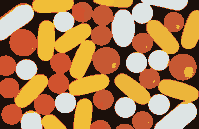

In [344]:
cv2_imshow(thuoc)
cv2_imshow(Kmeans2(thuoc, 6, 0))
cv2_imshow(Kmeans2(thuoc, 6, 1))
cv2_imshow(Kmeans2(thuoc, 6, 2))

## Graph Cut

In [345]:
def GraphSeg(path_filename, x, y, w, h):
  img = cv2.imread(path_filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  print(img.shape)

  mask = np.zeros(img.shape[:2], np.uint8)
  backgroundModel = np.zeros((1, 65), np.float64)
  foregroundModel = np.zeros((1, 65), np.float64)
  rectangle = (x, y, w, h)
  cv2.grabCut(img, mask, rectangle, backgroundModel, foregroundModel, 5, cv2.GC_INIT_WITH_RECT)

  mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
  res = img * mask2[:, :, np.newaxis]
  plt.imshow(res)
  res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

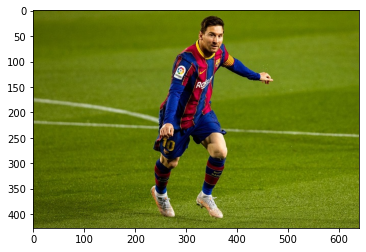

(427, 640, 3)


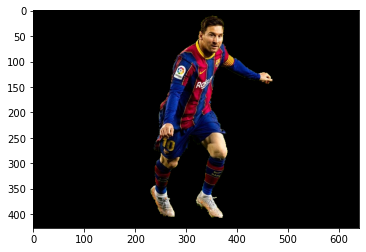

In [346]:
GraphSeg(lionelmessi_path, 230, 8, 240, 410)

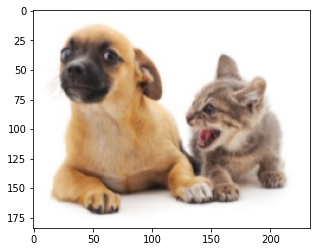

(184, 234, 3)


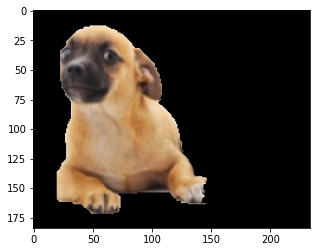

In [347]:
GraphSeg(dogcat_path, 20, 8, 128, 166)

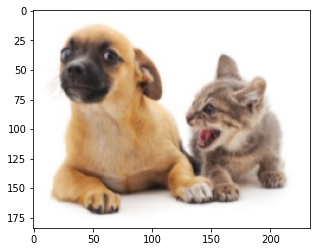

(184, 234, 3)


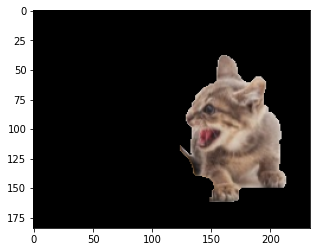

In [348]:
GraphSeg(dogcat_path, 120, 35, 170, 240)

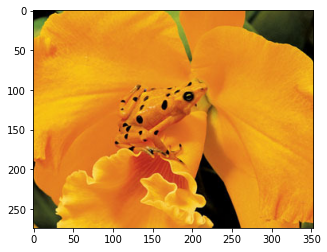

(274, 353, 3)


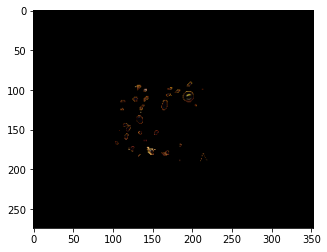

In [349]:
GraphSeg(camourflage_path, 100, 60, 120, 130)

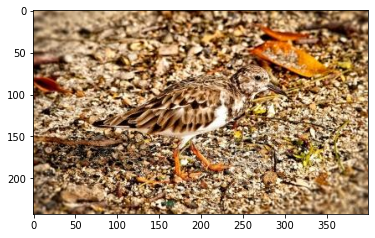

(243, 400, 3)


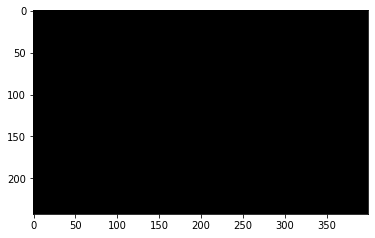

In [350]:
GraphSeg(camourflage2_path, 80, 60, 220, 140)